In [1]:
import scanpy as sc
import scvelo as scv
import numpy as np
import os
from anndata import AnnData as ad

In [2]:
sc.settings.datasetdir="../../project_folder/datasets/raw/"

Read dataset 

In [119]:
adata_raw = sc.datasets.pbmc3k()
adata_raw

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [120]:
# sc.pp.filter_genes(adata_raw, min_cells=5)

Get processed version for annotation

In [121]:
adata_processed = sc.datasets.pbmc3k_processed()
adata_processed_full = adata_raw.copy()

Get full and downsampled dataset

In [122]:
adata_processed.X = adata_raw[list(adata_processed.obs.index), list(adata_processed.var.index)].X
adata_processed.layers["X_counts"] = adata_processed.X.copy()
adata_processed.obs = adata_processed.obs.rename(columns={"louvain": "cell_type"})

In [123]:
adata_processed_full = adata_processed_full[list(adata_processed.obs.index), :]
adata_processed_full.layers["X_counts"] = adata_processed_full.X.copy()
adata_processed_full.obs = adata_processed.obs.copy()
sc.pp.filter_genes(adata_processed_full, min_cells=5)

Keep subset of cells

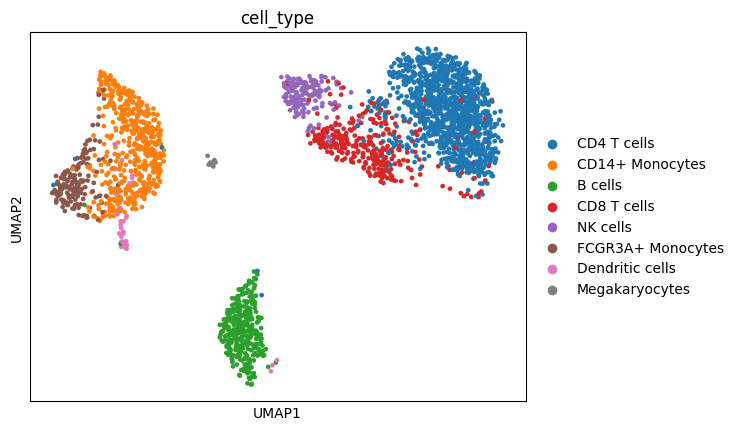

In [124]:
sc.pp.log1p(adata_processed)
sc.tl.pca(adata_processed)
sc.pp.neighbors(adata_processed)
sc.tl.umap(adata_processed)
sc.pl.umap(adata_processed, color="cell_type")

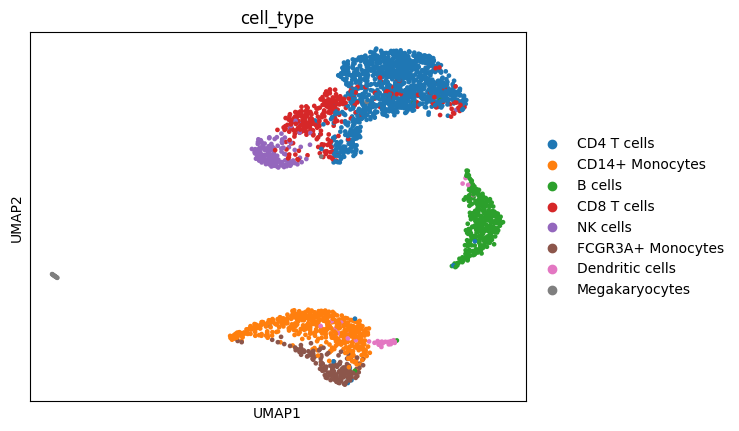

In [125]:
sc.pp.log1p(adata_processed_full)
sc.tl.pca(adata_processed_full)
sc.pp.neighbors(adata_processed_full)
sc.tl.umap(adata_processed_full)
sc.pl.umap(adata_processed_full, color="cell_type")

Save

In [128]:
ad.write_h5ad(adata_processed, "../../project_folder/datasets/processed/pbmc3k.h5ad")

In [129]:
ad.write_h5ad(adata_raw, "../../project_folder/datasets/raw/pbmc3k.h5ad")

In [130]:
ad.write_h5ad(adata_processed_full, "../../project_folder/datasets/processed_full_genome/pbmc3k.h5ad")